### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_recall_curve, auc, f1_score, 
    confusion_matrix, classification_report
)

In [2]:
# Load the resampled Fraud Data
X_train = pd.read_csv('../data/processed/X_train_res.csv')
y_train = pd.read_csv('../data/processed/y_train_res.csv').iloc[:, 0]
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').iloc[:, 0]

In [3]:
def evaluate_fraud_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Precision-Recall AUC (Crucial for Imbalanced Data)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auc_pr = auc(recall, precision)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n--- {name} Results ---")
    print(f"AUC-PR: {auc_pr:.4f} | F1: {f1:.4f}")
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    return auc_pr, f1

c:\Users\Lenovo\Documents\KAIM\Week5\Fraud-Detection\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression Results ---
AUC-PR: 0.6418 | F1: 0.5986


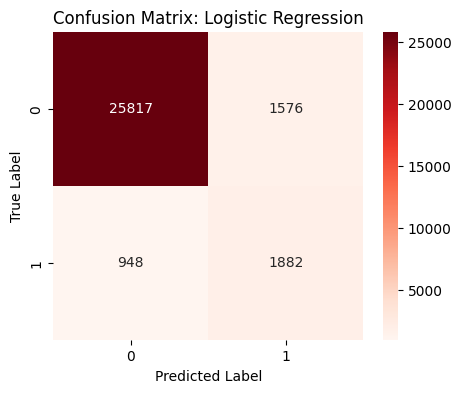

In [4]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate Baseline
lr_auc, lr_f1 = evaluate_fraud_model(lr_model, X_test, y_test, "Logistic Regression")


--- Random Forest Results ---
AUC-PR: 0.7164 | F1: 0.6628


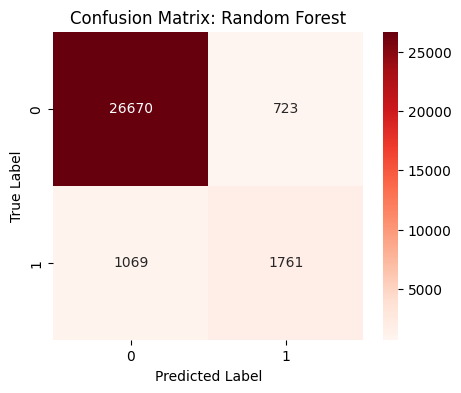

In [5]:
# Train Random Forest with basic hyperparameter tuning
# n_estimators=100 (number of trees), max_depth=10 (prevent overfitting)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Ensemble
rf_auc, rf_f1 = evaluate_fraud_model(rf_model, X_test, y_test, "Random Forest")

In [6]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='f1')

print(f"RF Mean F1-Score: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

RF Mean F1-Score: 0.9084 (+/- 0.0008)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8700\4108886313.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='magma')


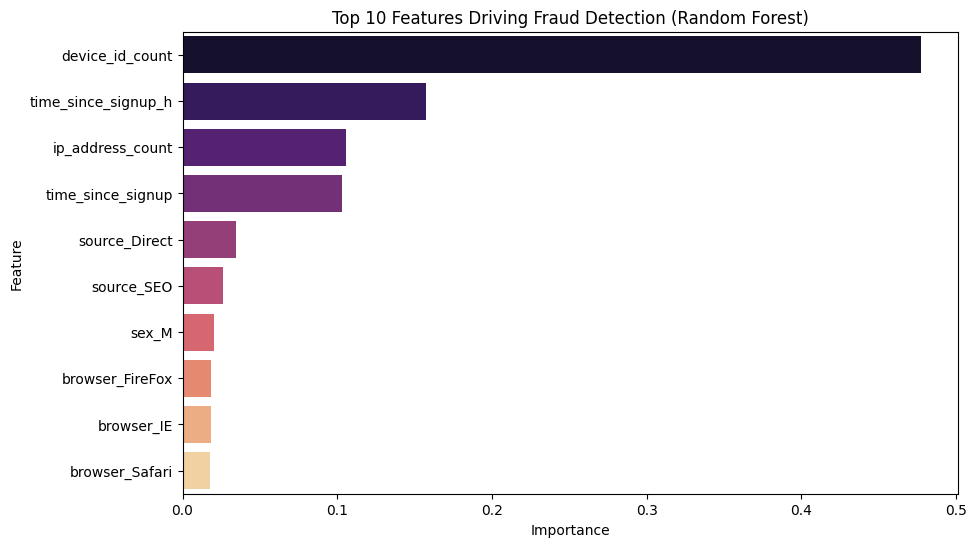

In [7]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='magma')
plt.title('Top 10 Features Driving Fraud Detection (Random Forest)')
plt.show()